Nb Desc

Installing Libaries

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

Reading in Cleaned dataframe for EDA

In [165]:
df = pd.read_csv("/Users/abbeylasater/Desktop/ferritin-risk-model/cleaned_data.csv")

Understanding Data Structure

In [166]:
print(df.head())

       SEQN  SDDSRVYR  RIDSTATR  RIDAGEYR  RIDRETH3  BMXWT  BMXHT  BMXBMI  \
0  130380.0      12.0       2.0      44.0       2.0   69.4  152.9    29.7   
1  130390.0      12.0       2.0      31.0       3.0  122.7  163.3    46.0   
2  130391.0      12.0       2.0      33.0       3.0  116.3  172.8    38.9   
3  130406.0      12.0       2.0      26.0       3.0   69.0  165.7    25.1   
4  130419.0      12.0       2.0      18.0       6.0   83.2  166.2    30.1   

   LBXFER  
0    13.3  
1    52.1  
2    91.0  
3    28.0  
4    21.6  


In [167]:
df.dtypes

SEQN        float64
SDDSRVYR    float64
RIDSTATR    float64
RIDAGEYR    float64
RIDRETH3    float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
LBXFER      float64
dtype: object

In [168]:
df.shape

(1472, 9)

Summary Stats

In [169]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIDAGEYR,RIDRETH3,BMXWT,BMXHT,BMXBMI,LBXFER
count,1472.000000,1472.0,1472.0,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,136442.038043,12.0,2.0,29.110734,3.192935,71.959171,161.691508,27.453125,44.872031
std,3414.614966,0.0,0.0,11.333069,1.533050,18.817028,6.842337,6.692293,32.813022
min,130380.000000,12.0,2.0,12.000000,1.000000,31.600000,141.100000,14.000000,2.050000
25%,133437.750000,12.0,2.0,18.000000,2.000000,57.800000,156.900000,22.300000,19.300000
50%,136633.500000,12.0,2.0,30.000000,3.000000,68.600000,161.800000,26.200000,36.000000
75%,139379.000000,12.0,2.0,39.000000,4.000000,83.225000,166.400000,31.800000,62.250000
max,142300.000000,12.0,2.0,49.000000,7.000000,126.900000,181.600000,46.100000,144.000000


target variable

Defining target variable
ferritin deficiency is < 40 ng/ml
below optimal ferritin is <100 ng/ml
source: https://pmc.ncbi.nlm.nih.gov/articles/PMC4647225/

Typical Range: 11 to 307 micrograms per liter. (Mayo Clinic)

In [170]:
# boolean col indicating whether or not someone is deficient in ferritin
df['ferritin_deficiency'] = (df['LBXFER'] < 40).astype(int)

In [171]:
print(df)

          SEQN  SDDSRVYR  RIDSTATR  RIDAGEYR  RIDRETH3  BMXWT  BMXHT  BMXBMI  \
0     130380.0      12.0       2.0      44.0       2.0   69.4  152.9    29.7   
1     130390.0      12.0       2.0      31.0       3.0  122.7  163.3    46.0   
2     130391.0      12.0       2.0      33.0       3.0  116.3  172.8    38.9   
3     130406.0      12.0       2.0      26.0       3.0   69.0  165.7    25.1   
4     130419.0      12.0       2.0      18.0       6.0   83.2  166.2    30.1   
...        ...       ...       ...       ...       ...    ...    ...     ...   
1467  142225.0      12.0       2.0      17.0       1.0   73.0  165.9    26.5   
1468  142263.0      12.0       2.0      44.0       3.0   61.3  164.8    22.6   
1469  142272.0      12.0       2.0      12.0       3.0   49.8  166.3    18.0   
1470  142280.0      12.0       2.0      23.0       7.0  112.9  171.4    38.4   
1471  142300.0      12.0       2.0      46.0       1.0   75.2  151.8    32.6   

      LBXFER  ferritin_deficiency  
0  

Visualizing Distributions

What distributions do we want to see?
- by count -- see where the max is, avg, distribution etc of ferritin levels
- 

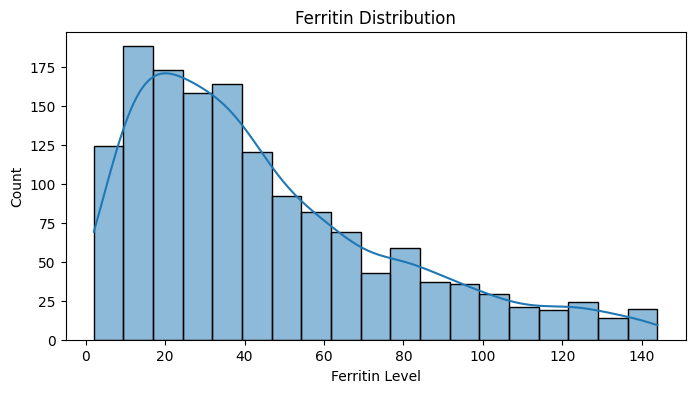

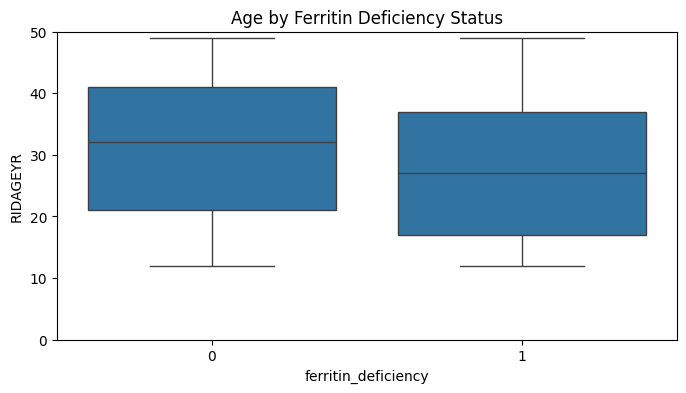

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['LBXFER'], kde=True)
plt.title('Ferritin Distribution')
plt.xlabel('Ferritin Level')
plt.show()

# Plot 2: Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='ferritin_deficiency', y='RIDAGEYR', data=df)
plt.ylim(0, 50)
plt.title('Age by Ferritin Deficiency Status')
plt.show()


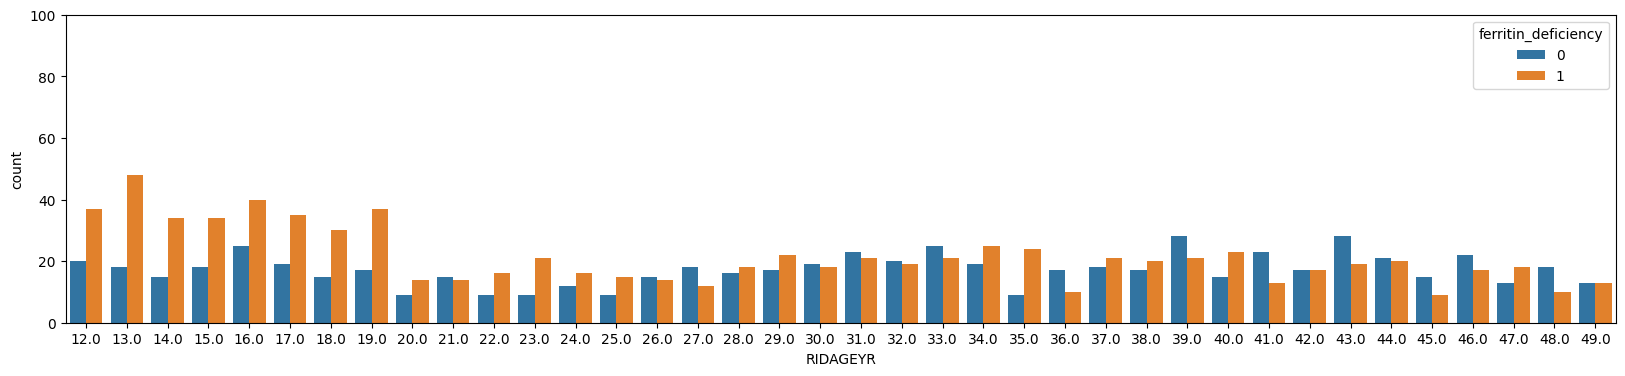

In [173]:
plt.figure(figsize=(20, 4))
sns.countplot(x='RIDAGEYR', hue='ferritin_deficiency', data=df)

plt.ylim(0, 100)
plt.show()

What are these visuals telling us?
- ferritin levels occurs most between 0 and 40
- those deficient in ferritin tend to be younger w mid in mid 20s (child bearing years) 25% quartile starts around puberty age,
- by age, ferritin deficiency is most likely to occur in a higher percentage from ages 12 to 19

What questions does this lead to?
do those who struggle w ferritin deficieny differ in body composition -- are those w higher bmi more likely or less liekly (low caloric intake -- nutritional deficiency)
at what age is ferritin deficiency LESS likely to occur

age, race/ethnicicy

Looking into relations

<Axes: >

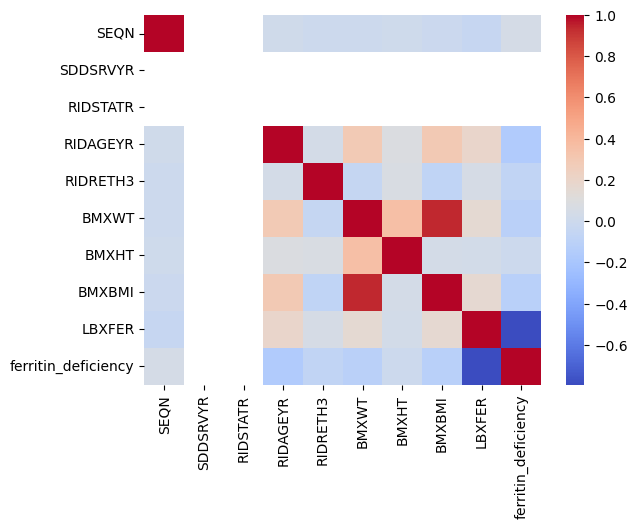

In [174]:
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')


this tells us that bmxbmi and other body measurements should be dropped 

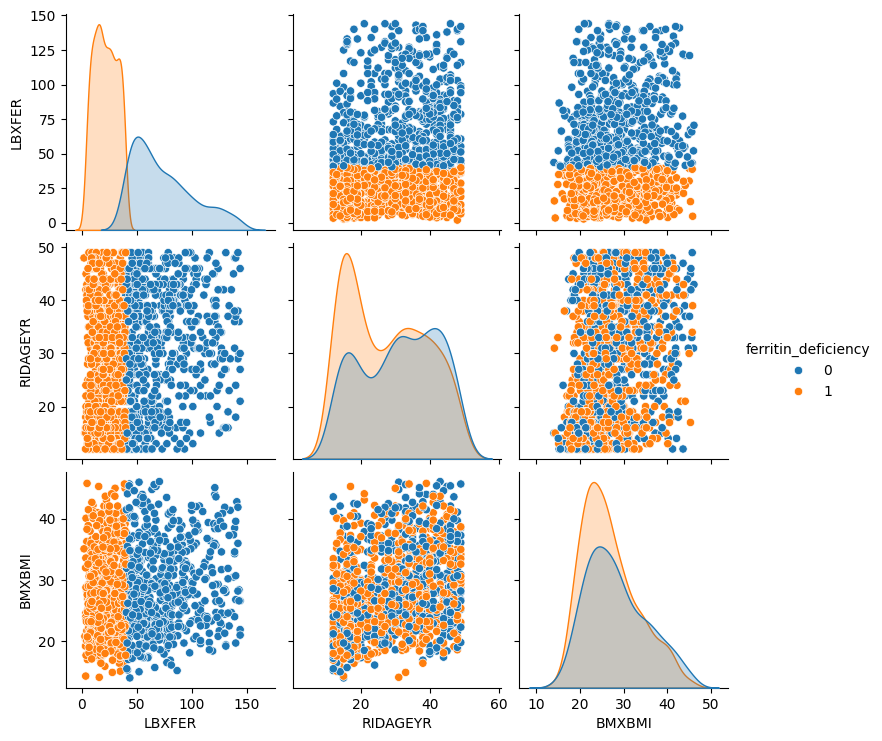

In [175]:
sns.pairplot(df[['LBXFER', 'RIDAGEYR','BMXBMI', 'ferritin_deficiency']], hue='ferritin_deficiency')


In [176]:
df.groupby('RIDRETH3')['ferritin_deficiency'].mean()


RIDRETH3
1.0    0.633880
2.0    0.666667
3.0    0.497101
4.0    0.621762
6.0    0.450980
7.0    0.538462
Name: ferritin_deficiency, dtype: float64

Creating Bins based on a womans stage of life

In [177]:
def age_stage(age):
    if age < 12:
        return 'PRE-PUBERTY'
    elif age <17:
        return 'PUBERTY'
    elif age < 44:
        return 'CHILD-BEARING'
    elif age < 54:
        return 'PERIMENOPAUSE'
    else:
        return 'POSTMENOPAUSE'

df['age_group'] = df['RIDAGEYR'].apply(age_stage)

In [178]:
print(df)

          SEQN  SDDSRVYR  RIDSTATR  RIDAGEYR  RIDRETH3  BMXWT  BMXHT  BMXBMI  \
0     130380.0      12.0       2.0      44.0       2.0   69.4  152.9    29.7   
1     130390.0      12.0       2.0      31.0       3.0  122.7  163.3    46.0   
2     130391.0      12.0       2.0      33.0       3.0  116.3  172.8    38.9   
3     130406.0      12.0       2.0      26.0       3.0   69.0  165.7    25.1   
4     130419.0      12.0       2.0      18.0       6.0   83.2  166.2    30.1   
...        ...       ...       ...       ...       ...    ...    ...     ...   
1467  142225.0      12.0       2.0      17.0       1.0   73.0  165.9    26.5   
1468  142263.0      12.0       2.0      44.0       3.0   61.3  164.8    22.6   
1469  142272.0      12.0       2.0      12.0       3.0   49.8  166.3    18.0   
1470  142280.0      12.0       2.0      23.0       7.0  112.9  171.4    38.4   
1471  142300.0      12.0       2.0      46.0       1.0   75.2  151.8    32.6   

      LBXFER  ferritin_deficiency      

In [179]:
print(df.groupby('age_group')['ferritin_deficiency'].mean())


age_group
CHILD-BEARING    0.539235
PERIMENOPAUSE    0.460317
PUBERTY          0.667820
Name: ferritin_deficiency, dtype: float64


You can start by checking:

T-tests or ANOVA between ferritin_deficient and continuous predictors
Chi-squared for categorical ones
Or early feature importance with a simple model (e.g. RandomForest)

In [186]:
from scipy.stats import ttest_ind

cont_vars = ['BMXBMI', 'RIDAGEYR', 'BMXHT', 'BMXWT']

for col in cont_vars:
    group0 = df[df['ferritin_deficiency'] == 0][col]
    group1 = df[df['ferritin_deficiency'] == 1][col]
    t_stat, p_val = ttest_ind(group0.dropna(), group1.dropna())
    print(f"{col}: p = {p_val:.4f} | {'*' if p < 0.05 else ''} :  t = {t_stat:.4f}  ")


BMXBMI: p = 0.0000 | * :  t = 4.4919  
RIDAGEYR: p = 0.0000 | * :  t = 6.1479  
BMXHT: p = 0.9300 | * :  t = 0.0879  
BMXWT: p = 0.0000 | * :  t = 4.2333  


In [185]:
cat_vars = ['RIDRETH3', 'age_group']

for col in cat_vars:
    table = pd.crosstab(df[col], df['ferritin_deficiency'])
    chi2, p, dof, _ = chi2_contingency(table)
    print(f"{col}: p = {p:.4f} | {'*' if p < 0.05 else ''}")


RIDRETH3: p = 0.0000 | *
age_group: p = 0.0000 | *


Feature Selection